In [ ]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Usaremos la base de datos: Beijing Multi-Site Air-Quality Data Data Set,
# la cual puede ser obtenida desde https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data
# (revisar la página para más detalles sobre los datos)
# Se ha proporcionado un archivo csv con la información obtenida de la estación
# de monitoreo Aotizhongxin, el cual contiene 35,064 registros.

# El objetivo es poder predecir la concetración de PM2.5 y de PM10 a partir de las
# variables año, mes, día, hora, temperatura, presión, punto de rocío, 
# precipitación y velocidad del viento.

# Part 1: Load data into Colab

In [ ]:
# Requiered to select a file from your HD
from google.colab import files
uploaded = files.upload()

Saving PRSA_Aotizhongxin.csv to PRSA_Aotizhongxin.csv


In [ ]:
# Import file and store it in a data frame
df = pd.read_csv('PRSA_Aotizhongxin.csv') # Cambia al nombre del archivo que cargues
df.dropna(inplace=True)
df
# Quedan 31,815 registros despues de eliminar NaN's

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


# Part 2: Format data and split it into numpy arrays

In [ ]:
# AUX function to put categorical data into one-hot encoding format
from sklearn.preprocessing import OneHotEncoder
def winddir_to_categorical(winddir):
  enc = OneHotEncoder(sparse=False)
  WD = enc.fit_transform(winddir)
  print("== categories:", enc.categories_, "==")
  return WD, [item for sublist in enc.categories_ for item in sublist]

== categories: [array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)] ==
Input values X with shape (31815, 28). With values


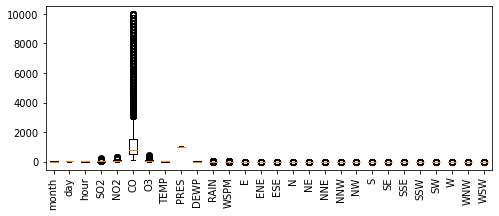

In [ ]:
# Extract input features and convert them to a numpy array
labels = ['month',	'day',	'hour', 'SO2',	'NO2',	'CO',	'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM' ]
X = df[labels].to_numpy()
WD, categories = winddir_to_categorical(df[['wd']])
X = np.concatenate((X, WD), axis=1)

print(f"Input values X with shape {X.shape}. With values")

plt.figure(figsize=(8, 3))
plt.boxplot(X)
plt.xticks(range(1, 29), labels + categories, rotation=90)
plt.show()

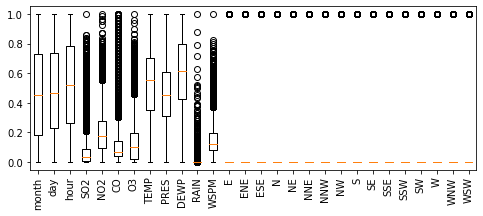

In [ ]:
# Normalize (zero-center) and standardize (scale) input data
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()
X = scalerX.fit_transform(X)

plt.figure(figsize=(8, 3))
plt.boxplot(X)
plt.xticks(range(1, 29), labels + categories, rotation=90)
plt.show()

Target values Y with shape (31815, 2). With values
 min = [3. 2.]
 mean = [ 81.86363036 109.12068521]
 stdd = [80.44822547 93.71654394]
 max = [713. 948.]


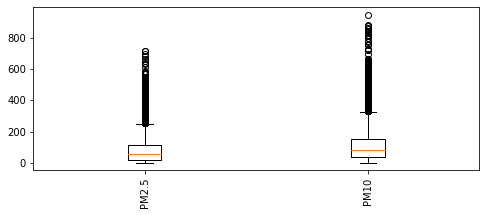

In [ ]:
# Extract output features and convert them to a numpy array
Y = df[['PM2.5', 'PM10']].to_numpy()

print(f"Target values Y with shape {Y.shape}. With values")
print(f" min = {Y.min(axis=0)}")
print(f" mean = {Y.mean(axis=0)}")
print(f" stdd = {Y.std(axis=0)}")
print(f" max = {Y.max(axis=0)}")

plt.figure(figsize=(8, 3))
plt.boxplot(Y)
plt.xticks(range(1, 3), ['PM2.5', 'PM10'], rotation=90)
plt.show()

 min = [0. 0.]
 mean = [0.11107554 0.1132354 ]
 stdd = [0.11330736 0.09906611]
 max = [1. 1.]


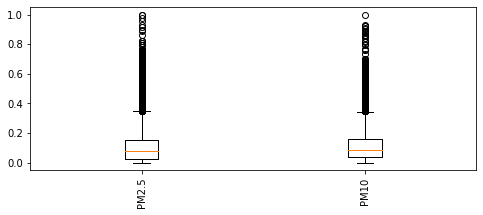

In [ ]:
# Normalize (zero-center) and standardize (scale) output data
scalerY = MinMaxScaler()
Y = scalerY.fit_transform(Y)

print(f" min = {Y.min(axis=0)}")
print(f" mean = {Y.mean(axis=0)}")
print(f" stdd = {Y.std(axis=0)}")
print(f" max = {Y.max(axis=0)}")

plt.figure(figsize=(8, 3))
plt.boxplot(Y)
plt.xticks(range(1, 3), ['PM2.5', 'PM10'], rotation=90)
plt.show()

In [ ]:
# Split data into train+val and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30224, 28)
(30224, 2)
(1591, 28)
(1591, 2)


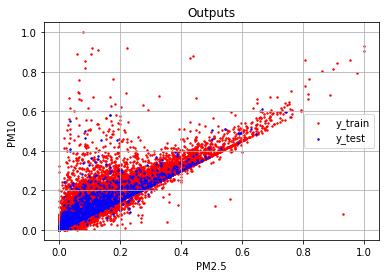

In [ ]:
# Plot y_test
# Esta gráfica es para ver sólo si los sets de entrenamiento y test cubren las mismas
# áreas (¿tienen la misma distribución?). No se espera que los puntos coincidan ya que
# son dos sets distintos.
plt.scatter(y_train[:, 0], y_train[:, 1], c='r', s=2, label='y_train')
plt.scatter(y_test[:, 0], y_test[:, 1], c='b', s=2, label='y_test')

plt.legend()
plt.grid(True)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Outputs')
plt.show()

# Part 3: Create DNN model and train it

In [ ]:
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# Create a Deep Network
DNN = Sequential()
DNN.add(InputLayer(input_shape=X.shape[1:], name='INPUT'))

DNN.add(Dense(units=256, activation='relu'))
DNN.add(Dense(units=512, activation='relu'))
DNN.add(Dense(units=1024, activation='relu'))
DNN.add(Dense(units=512, activation='relu'))
DNN.add(Dense(units=256, activation='relu'))

DNN.add(Dense(units=Y.shape[1], activation='linear', name='OUTPUT'))

DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7424      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 OUTPUT (Dense)              (None, 2)                 514       
                                                                 
Total params: 1,320,962
Trainable params: 1,320,962
Non-

In [ ]:
def r_square(y, y_hat):
  """ Define R square loss, to use it as metric during training
  """
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_hat)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  return tf.subtract(1.0, residual / total)

In [ ]:
def my_mse(y, y_hat):
  """ Define MSE loss, to use it as loss function
  """
  return tf.reduce_mean(tf.square(y - y_hat))

In [ ]:
# Define training parameters
# Option 1:
#from tensorflow.keras.optimizers import SGD
#sgd = SGD(learning_rate=0.02, momentum=0.6)
#DNN.compile(optimizer=sgd, loss='mse')

# Option 2:
DNN.compile(optimizer='adam', loss=my_mse, metrics=['mape', r_square])

# Try with different optimizers
#DNN.compile(optimizer=???, loss='mse')

In [ ]:
# Train model
DNN.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_split=0.1)

Epoch 1/100
213/213 [==============================] - 5s 8ms/step - loss: 0.0049 - mape: 210447.7344 - r_square: 0.5586 - val_loss: 0.0030 - val_mape: 196592.1875 - val_r_square: 0.7239
Epoch 2/100
213/213 [==============================] - 1s 7ms/step - loss: 0.0034 - mape: 152697.8594 - r_square: 0.6977 - val_loss: 0.0030 - val_mape: 219162.3125 - val_r_square: 0.7177
Epoch 3/100
213/213 [==============================] - 1s 6ms/step - loss: 0.0033 - mape: 158988.4062 - r_square: 0.7112 - val_loss: 0.0027 - val_mape: 167979.6094 - val_r_square: 0.7472
Epoch 4/100
213/213 [==============================] - 1s 6ms/step - loss: 0.0031 - mape: 149650.6406 - r_square: 0.7270 - val_loss: 0.0026 - val_mape: 174708.3594 - val_r_square: 0.7573
Epoch 5/100
213/213 [==============================] - 1s 7ms/step - loss: 0.0028 - mape: 148472.5156 - r_square: 0.7502 - val_loss: 0.0029 - val_mape: 190188.9062 - val_r_square: 0.7302
Epoch 6/100
213/213 [==============================] - 1s 6ms/ste

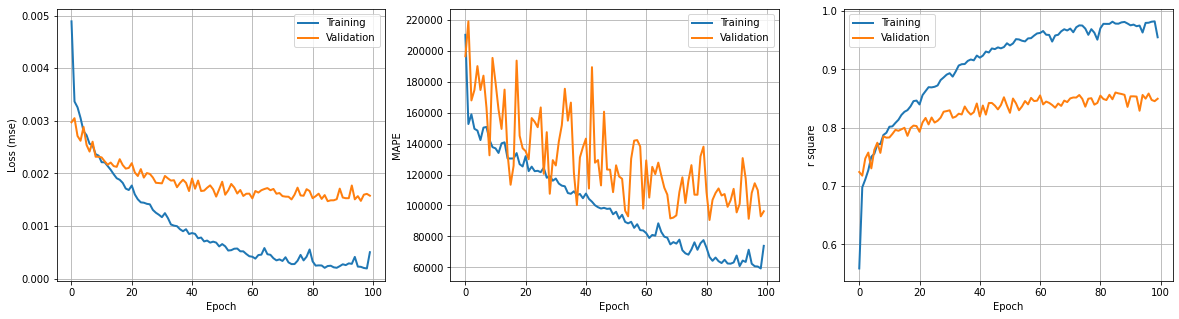

In [ ]:
# Plot loss
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(DNN.history.history['loss'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (mse)')
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(DNN.history.history['mape'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_mape'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.grid()
plt.subplot(1, 3, 3)
plt.plot(DNN.history.history['r_square'], label='Training', linewidth=2)
plt.plot(DNN.history.history['val_r_square'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('r square')
plt.grid()
plt.show()

In [ ]:
# Generalization metric (opcional)
min_loss = np.min([DNN.history.history['loss'][-1], DNN.history.history['val_loss'][-1]])
max_loss = np.max([DNN.history.history['loss'][-1], DNN.history.history['val_loss'][-1]])
general_loss = (max_loss - min_loss) / max_loss
print(f"Generalization error: {general_loss:6.4f}%")

Generalization error: 0.6824%


In [ ]:
# Compute test loss
loss_test = DNN.evaluate(x=x_test, y=y_test, verbose=False)
print("Test loss, MAPE, and r2:", loss_test)

Test loss, MAPE, and r2: [0.001994132297113538, 183327.703125, 0.79424649477005]


In [ ]:
# Predict on test set
y_test_hat = DNN.predict(x=x_test)
print(y_test_hat.shape)

(1591, 2)


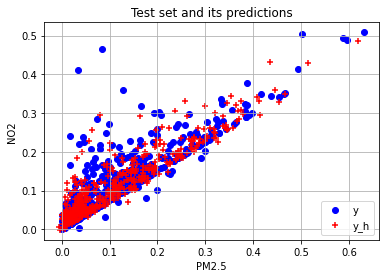

In [ ]:
# Plot y_test_hat
indx = np.random.permutation(len(y_test))[:500]
plt.scatter(y_test[indx, 0], y_test[indx, 1], c='b', label='y')
plt.scatter(y_test_hat[indx, 0], y_test_hat[indx, 1], c='r', marker='+', label='y_h')

plt.legend()
plt.grid(True)
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.title('Test set and its predictions')
plt.show()